In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
# smile_att_path = '../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv'
# pathway_att_path = '../../data/GEP_CellBlind_LUNG_pathway_attention.csv'
# drug_sensitivity_path = '../../data/drug_sensitivity_lung_CellBlind_test&prediction.csv'
smile_att_path = '../../data/TransMCA_Smiles_Attention_MixedSet_GEP.csv'
pathway_att_path = '../../data/TransMCA_Pathway_Attention_MixedSet_GEP.csv'
drug_sensitivity_path = '../../data/drug_sensitivity_MixedSet_Erlotinib_test&prediction.csv'

In [3]:
df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
# 对pathway_name进行去重，打印
df_pathway['pathway_class'].drop_duplicates()

0      Mitochondrial ROS formation
1       CYP-mediated ROS formation
2                    ERK signaling
3             DNA adduct formation
4       Nuclear receptor signaling
                  ...             
495                            NaN
512                Prostate cancer
524               Cushing syndrome
538           Basal cell carcinoma
554             Huntington disease
Name: pathway_class, Length: 108, dtype: object

In [4]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib Gefitinib
# EGFR
drug_name = 'Erlotinib' # 靶向药物 EGFR
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis,'Small cell lung cancer']
target_pathway = ['MAPK signaling','PI3K signaling','ERK signaling','JAK-STAT signaling','mTOR signaling']
# target_pathway = ['MAPK signaling','ERK signaling']
target_pathway_detail = ['KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_PI3K_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_PATHWAY_ADAPTOR_PROTEINS','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_UBIQUITINATION_OF_RTK_BY_CBL','KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING','KEGG_MEDICUS_REFERENCE_MLK_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_PP2A_AKT_SIGNALING_PATHWA']

In [5]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [6]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
# df_smiles.head()

In [7]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
# df_smiles_single_drug.head()

In [8]:
df_smiles_att = pd.read_csv(smile_att_path)
# df_smiles_att.head()

In [9]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# NSCLC:['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
# ['SKMEL1','SKMEL2','SKMEL24']

cell_line = ['PC14'] # LUAD 发生EGFR突变：HCC827，PC14
# cell_line = ['EKVX','NCIH2228']
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
# print(df_smiles_att_single_drug.shape)
# df_smiles_att_single_drug.head()

In [10]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv(drug_sensitivity_path)
# 筛选出cell_line = ['NCIH2228','HCC827','EKVX','PC14']，drug = Gefitinib的数据
df_drug_sensitivity_single_drug = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line)) & (df_drug_sensitivity['drug'] == 'Refametinib')] #  & (df_drug_sensitivity['drug'] == drug_name)
print(df_drug_sensitivity_single_drug.shape)
# df_drug_sensitivity_single_drug.head()

(0, 6)


In [11]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)

In [12]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [13]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [14]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [15]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [16]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [17]:
start = 203
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_224_255 = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_224_255

array([['38', '35', '38', '38', '35', '38', '6', '37', '38', '4', '38',
        '37', '38', '7', '38', '4', '37', '38', '6', '5', '38', '4',
        '37', '36', '38', '37', '36', '7', '5', '36', '38', '8', '37',
        '38', '38', '37', '38', '38', '4', '37', '38', '8', '5', '38',
        '45', '38', '5', '35', '38', '38', '35', '38'],
       ['C', 'O', 'C', 'C', 'O', 'C', '1', '=', 'C', '(', 'C', '=', 'C',
        '2', 'C', '(', '=', 'C', '1', ')', 'C', '(', '=', 'N', 'C', '=',
        'N', '2', ')', 'N', 'C', '3', '=', 'C', 'C', '=', 'C', 'C', '(',
        '=', 'C', '3', ')', 'C', '#', 'C', ')', 'O', 'C', 'C', 'O', 'C'],
       ['0.003583779', '0.004126188', '0.004817098', '0.003870389',
        '0.004736577', '0.054329842', '0.00549863', '0.00731571',
        '0.014962277', '0.014049462', '0.015433264', '0.023164764',
        '0.006192931', '0.005234589', '0.006625508', '0.006768137',
        '0.010193159', '0.015016866', '0.013125713', '0.018252796',
        '0.026901573', '0.0063

In [18]:
df_pathways_att = pd.read_csv(pathway_att_path)
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(1, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9317,Erlotinib,PC14,LUAD,0.001139,0.001279,0.001534,0.00261,0.001863,0.001139,0.000981,...,0.001532,0.001505,0.001533,0.001066,0.001849,0.00154,0.002953,0.001139,0.002938,0.001056


In [19]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001139
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001279
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001534
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.002610
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001863
dtype: float64

In [20]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [21]:
# 筛选出pathway_class是target_pathway的数据  二选一
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
print(df_pathways_info.shape)
df_pathways_info.head()

(55, 5)


,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
5,5,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALIN...,N01353,Env factor,ERK signaling
10,10,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_RAS_ERK_SIGN...,N01408,Env factor,ERK signaling
12,12,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_S...,N01348,Env factor,PI3K signaling
14,14,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,N01339,Env factor,PI3K signaling


In [22]:
# 筛选出pathway_class是target_pathway的数据  二选一
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].isin(target_pathway_detail)]
# print(df_pathways_info.shape)
# df_pathways_info.head()

In [23]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)]
# 从第二列开始取均值
df_gep_mean = df_gep.iloc[:, 1:].mean(axis=0)
df_gep_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            4.352209
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            1.894415
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      2.017583
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.047460
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    1.276917
dtype: float64

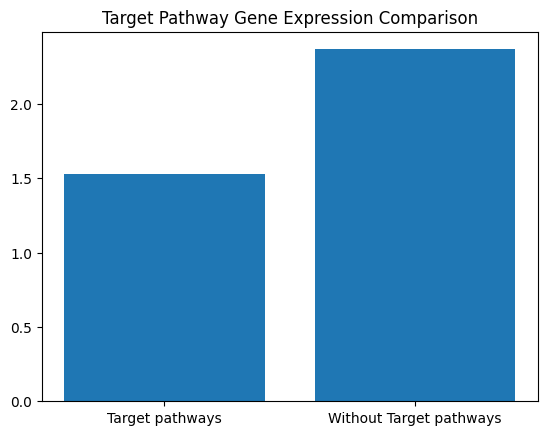

In [24]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_mean_DNA_replication = df_gep_mean[df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
df_gep_mean_without_DNA_replication = df_gep_mean[~df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_mean_DNA_replication.mean(), df_gep_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

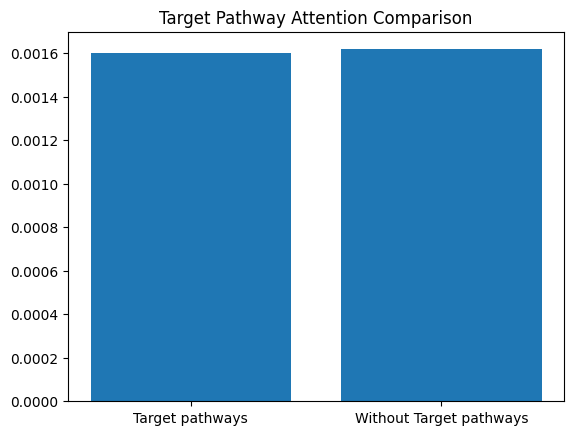

In [25]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [26]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [27]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
288,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
457,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION
426,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGN...
108,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING...
178,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIO...


In [28]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(60)

(55, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003046,KEGG_MEDICUS_REFERENCE_IL6_FAMILY_TO_JAK_STAT_...,295,N01556,Reference,JAK-STAT signaling
1,0.002942,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,358,N01163,Reference,PI3K signaling
2,0.002594,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PAT...,266,N01657,Reference,PI3K signaling
3,0.002432,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,377,N01165,Reference,PI3K signaling
4,0.001974,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,400,N01593,Reference,MAPK signaling
5,0.001963,KEGG_MEDICUS_REFERENCE_STRAD_STK11_TSC_SIGNALI...,418,N01576,Reference,mTOR signaling
6,0.001959,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,398,N01598,Reference,MAPK signaling
7,0.001953,KEGG_MEDICUS_REFERENCE_TSC1_2_MTORC1_SIGNALING...,451,N01575,Reference,mTOR signaling
8,0.001945,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RA...,399,N01595,Reference,MAPK signaling
9,0.001928,KEGG_MEDICUS_REFERENCE_MLK_JNK_SIGNALING_PATHWAY,345,N01594,Reference,MAPK signaling


In [29]:
other_pathways=['KEGG_MEDICUS_PATHOGEN_HTLV_1_P12_TO_JAK_STAT_SIGNALING_PATHWAY',
                'KEGG_MEDICUS_REFERENCE_TYPE_II_INTERFERON_TO_JAK_STAT_SIGNALING_PATHWAY',
                'KEGG_MEDICUS_REFERENCE_EP_NE_ADRB_PI3K_SIGNALING_PATHWAY',
                'KEGG_MEDICUS_REFERENCE_IGF_IGFR_PI3K_NFKB_SIGNALING_PATHWAY',
                'KEGG_MEDICUS_REFERENCE_MEMBRANE_INITIATED_PROGESTERONE_SIGNALING_PATHWAY']
# 将df_pathways_single_drug_mean_merge去除other_pathways
df_pathways_single_drug_mean_merge = df_pathways_single_drug_mean_merge[~df_pathways_single_drug_mean_merge['pathway_name'].isin(other_pathways)]
print(df_pathways_single_drug_mean_merge.shape)

(50, 6)


In [53]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(df_pathways_single_drug_mean_merge['pathway_name']), '#FF0000', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_PATHWAY,b
1,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b
2,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGNALING_PATHWAY,b
3,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING_PATHWAY,b
4,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIOSYNTHESIS,b
5,0.003046,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTRACELLULAR_ENDOLYSOSOMAL_DNASE,b
6,0.003046,KEGG_MEDICUS_REFERENCE_IL6_FAMILY_TO_JAK_STAT_SIGNALING_PATHWAY,#FF0000
7,0.003045,KEGG_MEDICUS_REFERENCE_HYDROLYSIS_OF_SPHINGOMYELIN,b
8,0.003027,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PROKR2_TO_PROK_PRKR_GI_ERK_SIGNALING_PATHWAY,b
9,0.003019,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY_AUXILIARY_FACTOR,b


In [54]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(1000)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_PATHWAY,b,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
1,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b,457,N00708,Reference,Phenylalanine and tyrosine metabolism
2,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGNALING_PATHWAY,b,426,N00227,Reference,Hepatocellular carcinoma
3,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING_PATHWAY,b,108,N00297,Reference,CRH-ACTH-cortisol signaling
4,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIOSYNTHESIS,b,178,N01580,Reference,Glycosaminoglycan biosynthesis
...,...,...,...,...,...,...,...
614,0.000988,KEGG_MEDICUS_REFERENCE_ADRB3_UCP1_SIGNALING_PATHWAY,b,112,N01688,Reference,Thermogenesis
615,0.000984,KEGG_MEDICUS_REFERENCE_RETROGRADE_AXONAL_TRANSPORT,b,409,N00976,Reference,Parkinson disease
616,0.000982,KEGG_MEDICUS_REFERENCE_EGF_JAK_STAT_SIGNALING_PATHWAY,b,230,N00094,Reference,Pancreatic cancer
617,0.000981,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,b,6,N01414,Env factor,Alzheimer disease


中值: 0.0015322
color为r，并且大于中值的个数: 0


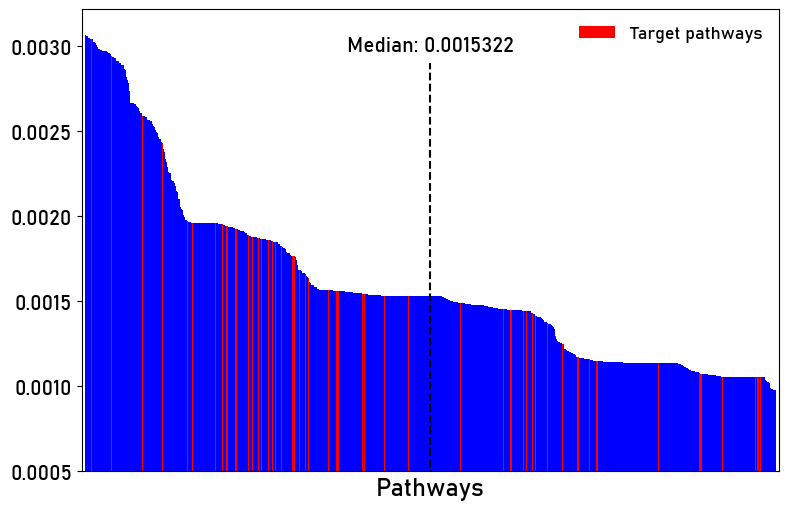

In [60]:
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 设置画布大小
plt.figure(figsize=(9, 6))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0029, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00295, 'Median: 0.0015322', ha='center', va='bottom', fontsize=15)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='#FF0000', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend(fontsize=13,edgecolor='white')
# 打印出中值
median = df_pathways_single_drug_mean['attention'].median()
print('中值:',median)
# 计算出df_pathways_single_drug_mean['attention']中color为r，并且大于中值的个数
print('color为r，并且大于中值的个数:',df_pathways_single_drug_mean[(df_pathways_single_drug_mean['color'] == 'r') & (df_pathways_single_drug_mean['attention'] > median)].shape[0])
plt.title(drug_name + ' Target Pathways Attention Distribution On PC14', fontsize=22)
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylim(bottom=0.0005)
plt.xlim(left=-3, right=621)
plt.xlabel('Pathways', fontsize=18)
# 保存图片
plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300)
plt.show()

In [364]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = (target_pathways.index+1) / 619
print('所占百分比:',p)

所占百分比: Index([0.011308562197092083,  0.04038772213247173,   0.0840064620355412,
        0.11308562197092084,  0.15024232633279483,   0.1567043618739903,
        0.19063004846526657,  0.20032310177705978,  0.20678513731825526,
         0.2197092084006462,  0.23747980613893377,  0.24394184168012925,
         0.2520193861066236,   0.2568659127625202,   0.2665589660743134,
         0.2730210016155089,   0.2762520193861066,   0.2859450726978998,
        0.30210016155088854,   0.3037156704361874,  0.31179321486268174,
         0.3198707592891761,   0.3247172859450727,  0.35379644588045234,
         0.3651050080775444,   0.3667205169628433,   0.3683360258481422,
        0.40226171243941844,  0.40549273021001614,   0.4345718901453958,
        0.46849757673667203,   0.5444264943457189,   0.6058158319870759,
          0.617124394184168,   0.6348949919224556,   0.6397415185783522,
         0.6478190630048465,   0.6526655896607432,   0.6704361873990307,
          0.691437802907916,   0.69628432956

In [365]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(55, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003046,KEGG_MEDICUS_REFERENCE_IL6_FAMILY_TO_JAK_STAT_SIGNALING_PATHWAY,r,295,N01556,Reference,JAK-STAT signaling
1,0.002942,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALING_PATHWAY,r,358,N01163,Reference,PI3K signaling
2,0.002594,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PATHWAY,r,266,N01657,Reference,PI3K signaling
3,0.002432,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY,r,377,N01165,Reference,PI3K signaling
4,0.001974,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_PTP,r,400,N01593,Reference,MAPK signaling
5,0.001963,KEGG_MEDICUS_REFERENCE_STRAD_STK11_TSC_SIGNALING_PATHWAY,r,418,N01576,Reference,mTOR signaling
6,0.001959,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_MRAS_SHOC2_PP1_HOLOPHOSPHATASE,r,398,N01598,Reference,MAPK signaling
7,0.001953,KEGG_MEDICUS_REFERENCE_TSC1_2_MTORC1_SIGNALING_PATHWAY,r,451,N01575,Reference,mTOR signaling
8,0.001945,KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_PATHWAY_ADAPTOR_PROTEINS,r,399,N01595,Reference,MAPK signaling
9,0.001928,KEGG_MEDICUS_REFERENCE_MLK_JNK_SIGNALING_PATHWAY,r,345,N01594,Reference,MAPK signaling


In [366]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_PATHWAY,b,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
1,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b,457,N00708,Reference,Phenylalanine and tyrosine metabolism
2,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGNALING_PATHWAY,b,426,N00227,Reference,Hepatocellular carcinoma
3,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING_PATHWAY,b,108,N00297,Reference,CRH-ACTH-cortisol signaling
4,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIOSYNTHESIS,b,178,N01580,Reference,Glycosaminoglycan biosynthesis
...,...,...,...,...,...,...,...
195,0.001669,KEGG_MEDICUS_REFERENCE_RECRUITMENT_AND_FORMATION_OF_THE_MCC,b,393,N01529,Reference,Regulation of kinetochore-microtubule interactions
196,0.001665,KEGG_MEDICUS_VARIANT_AMPLIFIED_MYC_TO_P15_CELL_CYCLE_G1_S,b,482,N00088,Variant,Small cell lung cancer
197,0.001661,KEGG_MEDICUS_REFERENCE_GATOR1_MTORC1_SIGNALING_PATHWAY,r,250,N01578,Reference,mTOR signaling
198,0.001652,KEGG_MEDICUS_REFERENCE_BCR_PLCG_CALCINEURIN_SIGNALING_PATHWAY,b,142,N00487,Reference,Calcium signaling
